In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [2]:
h = 0.6774

In [3]:
pop_file_loc = "/home/pranavsatheesh/host_galaxies/merger_file_runs/"

In [4]:
pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001.hdf5"

In [5]:
pop = h5py.File(pop_file, 'r')
list(pop['merging_population'].keys())

['MBH', 'Mdot', 'Mgas', 'Mstar', 'SFR', 'snap', 'subhalo_ids', 'z']

In [6]:
Mstar_merging = pop['merging_population']['Mstar'][:]
Mstar_non_merging = pop['non_merging_population']['Mstar'][:]

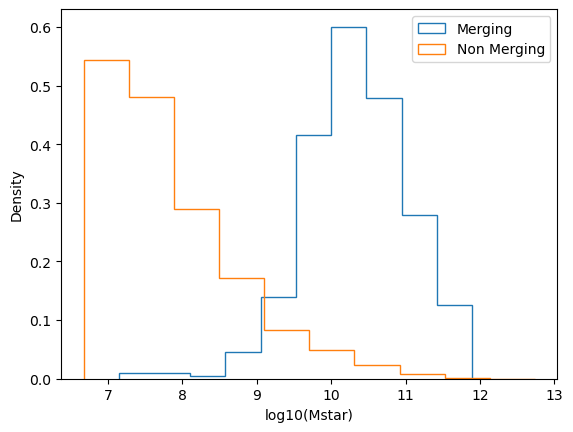

In [7]:
plt.hist(np.log10(Mstar_merging), bins=10, label='Merging',histtype='step',density=True)
plt.hist(np.log10(Mstar_non_merging), bins=10, label='Non Merging',histtype='step',density=True)
plt.xlabel('log10(Mstar)')
plt.ylabel('Density')
plt.legend()

In [35]:
SFR_merging = pop['merging_population']['SFR'][:][(pop['merging_population']['z'][:]>0)&(pop['merging_population']['z'][:]<1)&(Mstar_merging>1e10)&(Mstar_merging<1e11)]
SFR_non_merging = pop['non_merging_population']['SFR'][:][(pop['non_merging_population']['z'][:]>0)&(pop['non_merging_population']['z'][:]<1)&(Mstar_non_merging>1e10)&(Mstar_non_merging<10**11)]
print(len(SFR_merging), len(SFR_non_merging))

90 34605


In [37]:
np.mean(SFR_merging), np.mean(SFR_non_merging)

(np.float64(9.685893370045555), np.float64(4.277806787565896))

Text(0.5, 1.0, 'SFR distribution for galaxies with 9<log(M_star/M_sun)<10 at z=0-1')

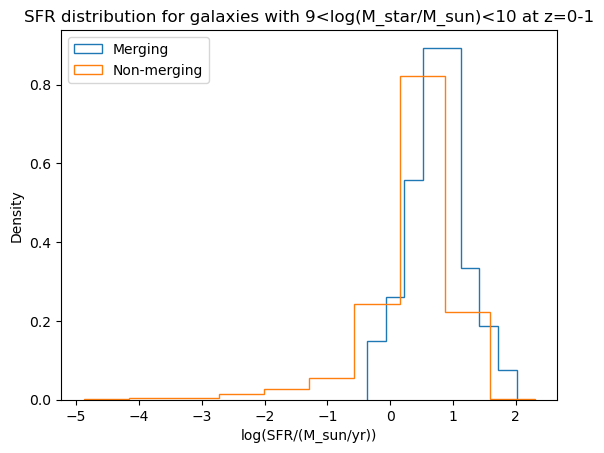

In [36]:
plt.hist(np.log10(SFR_merging[SFR_merging>0]), histtype='step',bins=8, density=True,label='Merging')
plt.hist(np.log10(SFR_non_merging[SFR_non_merging>0]), histtype='step', density=True, label='Non-merging')
plt.xlabel('log(SFR/(M_sun/yr))')
plt.ylabel('Density')
plt.legend()
plt.title('SFR distribution for galaxies with 9<log(M_star/M_sun)<10 at z=0-1')

In [38]:
def get_host_galaxy_property(property,z_min,z_max,Mstar_min,Mstar_max):
    merging_galaxies_property = pop['merging_population'][property][:][(pop['merging_population']['z'][:]>z_min)&(pop['merging_population']['z'][:]<z_max)&(pop['merging_population']['Mstar'][:]>Mstar_min)&(pop['merging_population']['Mstar'][:]<Mstar_max)]
    non_merging_galaxies_property = pop['non_merging_population'][property][:][(pop['non_merging_population']['z'][:]>z_min)&(pop['non_merging_population']['z'][:]<z_max)&(pop['non_merging_population']['Mstar'][:]>Mstar_min)&(pop['non_merging_population']['Mstar'][:]<Mstar_max)]
    return merging_galaxies_property, non_merging_galaxies_property

In [81]:
def plot_property_distribution(property,z_min,z_max,Mstar_min,Mstar_max):
    merging_galaxies_property, non_merging_galaxies_property = get_host_galaxy_property(property,z_min,z_max,Mstar_min,Mstar_max)
    plt.hist(np.log10(merging_galaxies_property[merging_galaxies_property>0]), histtype='step',bins=8, density=True,label='Merging')
    plt.hist(np.log10(non_merging_galaxies_property[non_merging_galaxies_property>0]), histtype='step', density=True, label='Non-merging')
    plt.xlabel(f'log(%s)'%(property))
    plt.ylabel('Density')
    plt.legend()
    print(Mstar_min)
    print(f'{int(np.log10(Mstar_min))}')
    plt.title(f'{property} distribution for galaxies with {int(np.log10(Mstar_min))}<log(M_star/M_sun)<{np.log10(Mstar_max):.1f} at z={z_min}-{z_max}')

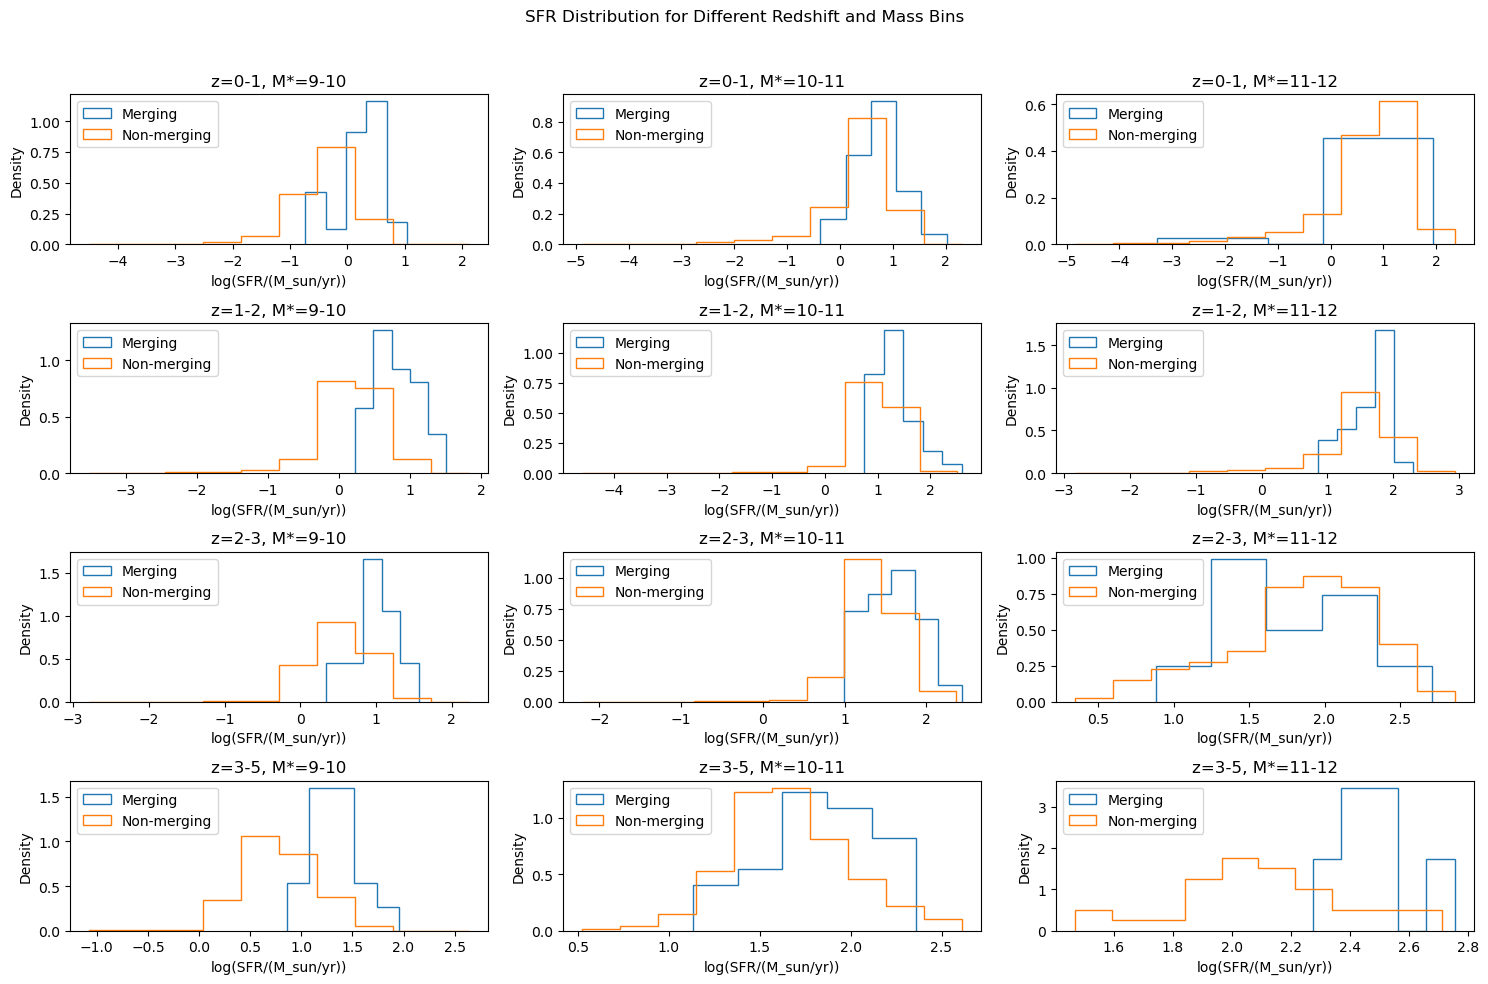

In [102]:
zbins = [0, 1, 2, 3, 5]
Mbins = [1e9, 1e10, 1e11,1e12]

fig, axes = plt.subplots(len(zbins)-1, len(Mbins)-1, figsize=(15, 10))
fig.suptitle('SFR Distribution for Different Redshift and Mass Bins')

for i in range(len(zbins)-1):
    for j in range(len(Mbins)-1):
        ax = axes[i, j]
        merging_galaxies_property, non_merging_galaxies_property = get_host_galaxy_property('SFR', zbins[i], zbins[i+1], Mbins[j], Mbins[j+1])
        ax.hist(np.log10(merging_galaxies_property[merging_galaxies_property>0]), histtype='step', bins=5, density=True, label='Merging')
        ax.hist(np.log10(non_merging_galaxies_property[non_merging_galaxies_property>0]), histtype='step', density=True, label='Non-merging')
        ax.set_xlabel('log(SFR/(M_sun/yr))')
        ax.set_ylabel('Density')
        ax.legend()
        ax.set_title(f'z={zbins[i]}-{zbins[i+1]}, M*={int(np.log10(Mbins[j]))}-{int(np.log10(Mbins[j+1]))}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [165]:
zbins = np.arange(0,5,0.7)
Mbins = [1e9, 1e10, 1e11, 1e12]

med_SFR_mrg = np.zeros((len(zbins)-1, len(Mbins)-1))
med_SFR_non_mrg = np.zeros((len(zbins)-1, len(Mbins)-1))

for i in range(len(zbins)-1):
    for j in range(len(Mbins)-1):
        merging_galaxies_property, non_merging_galaxies_property = get_host_galaxy_property('SFR', zbins[i], zbins[i+1], Mbins[j], Mbins[j+1])
        if(merging_galaxies_property.size == 0):
            med_SFR_mrg[i, j] = 0
            print(i,j)
        elif(non_merging_galaxies_property.size == 0):
            med_SFR_non_mrg[i, j] = 0
            print(i,j)
        else:
            med_SFR_mrg[i, j] = np.median(merging_galaxies_property)
            med_SFR_non_mrg[i, j] = np.median(non_merging_galaxies_property)


6 2


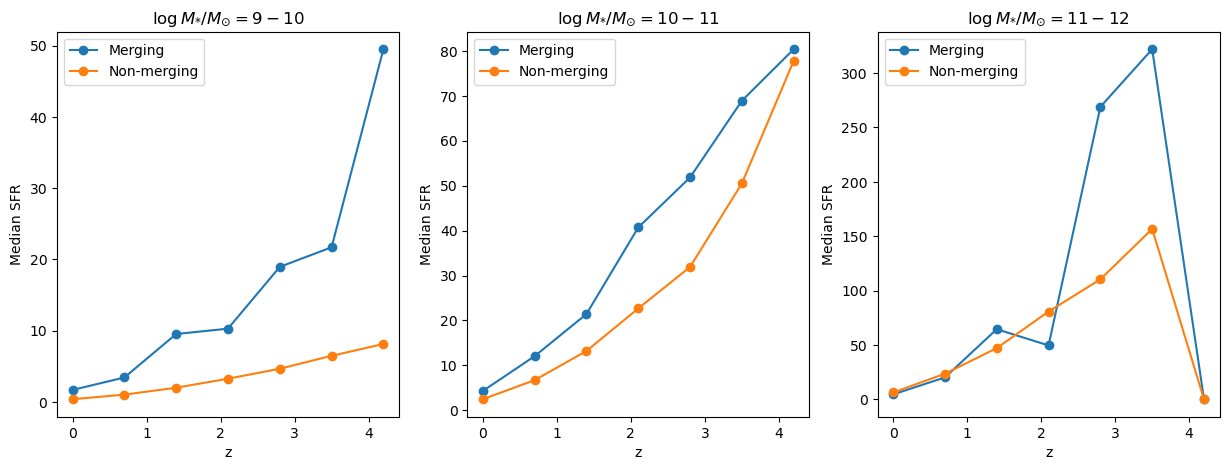

In [202]:
fig, axes = plt.subplots(1, len(Mbins)-1, figsize=(15,5))

for j in range(len(Mbins)-1):
    ax = axes[j]
    ax.plot(zbins[:-1], med_SFR_mrg[:,j], label='Merging',marker='o')
    ax.plot(zbins[:-1], med_SFR_non_mrg[:,j], label='Non-merging',marker='o')
    ax.set_xlabel('z')
    ax.set_ylabel('Median SFR')
    ax.legend()
    ax.set_title(f'$\log M_{{*}}/M_{{\odot}}={int(np.log10(Mbins[j]))}-{int(np.log10(Mbins[j+1]))}$')

1000000000
9


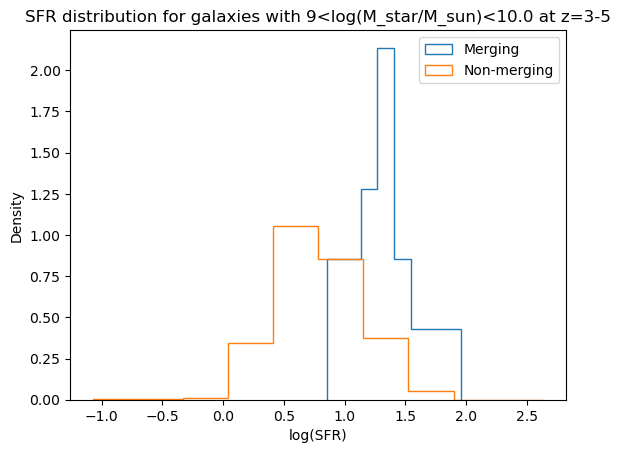

In [95]:
plot_property_distribution('SFR',3,5,10**9,10**10)

In [40]:
SFR_mrg,SFR_non_mrg = get_host_galaxy_property('SFR',0,1,1e10,1e11)

In [41]:
np.mean(SFR_mrg), np.mean(SFR_non_mrg)

(np.float64(9.685893370045555), np.float64(4.277806787565896))

In [220]:
Mstar_merging = pop['merging_population']['Mstar'][:][(pop['merging_population']['z'][:]>1)&(pop['merging_population']['z'][:]<1.5)]
Mstar_merging = Mstar_merging*1e10/h
SFR_merging = pop['merging_population']['SFR'][:][(pop['merging_population']['z'][:]>1)&(pop['merging_population']['z'][:]<1.5)]
sSFR_merging = SFR_merging/Mstar_merging

Mstar_non_merging = pop['non_merging_population']['Mstar'][:][(pop['non_merging_population']['z'][:]>1)&(pop['non_merging_population']['z'][:]<1.5)]
Mstar_non_merging = Mstar_non_merging*1e10/h
SFR_non_merging = pop['non_merging_population']['SFR'][:][(pop['non_merging_population']['z'][:]>1)&(pop['non_merging_population']['z'][:]<1.5)]
sSFR_non_merging = SFR_non_merging/Mstar_non_merging

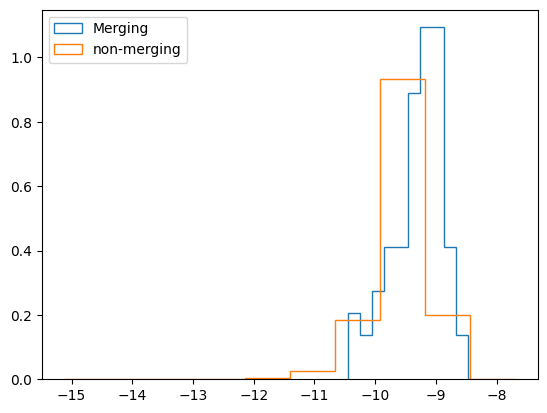

In [221]:
plt.hist(np.log10(sSFR_merging[sSFR_merging>0]),histtype="step",density=True, label='Merging')
plt.hist(np.log10(sSFR_non_merging[sSFR_non_merging>0]),histtype="step",density=True, label='non-merging')
plt.legend()

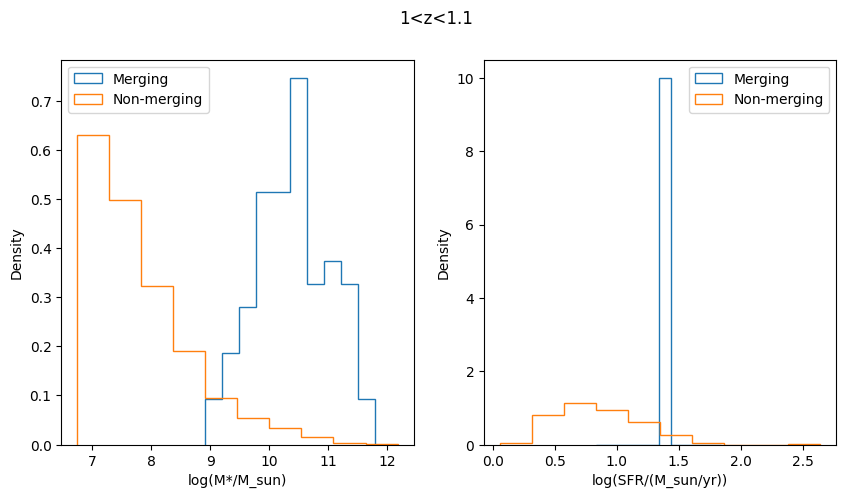

In [267]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))
plt.suptitle('1<z<1.1')
ax[0].hist(np.log10(Mstar_merging), histtype='step', density=True, label='Merging')
ax[0].hist(np.log10(Mstar_non_merging), histtype='step', density=True, label='Non-merging')
ax[0].set_xlabel('log(M*/M_sun)')
ax[0].set_ylabel('Density')
ax[0].legend()

ax[1].hist(np.log10(SFR_merging), histtype='step', density=True, label='Merging')
ax[1].hist(np.log10(SFR_non_merging[SFR_non_merging>0]), histtype='step', density=True, label='Non-merging')
ax[1].set_xlabel('log(SFR/(M_sun/yr))')
ax[1].set_ylabel('Density')
ax[1].legend()

ValueError: x and y must be the same size

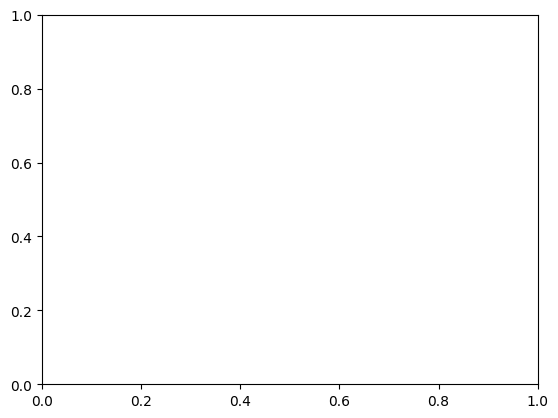

In [268]:

plt.scatter(Mstar_non_merging,SFR_non_merging, c='yellow', s=0.01, label='Non-merging', alpha=0.4)
plt.scatter(Mstar_merging,SFR_merging, c='r', s=0.7, label='Merging')
plt.xlabel('Mstar')
plt.ylabel('SFR')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
len(pop['merging_population']['subhalo_ids'][:])

7699

In [ ]:
pop['merging_population']['snap'][:]

array([ 4.,  4.,  5., ..., 99., 99., 99.])

In [ ]:
pop['non_merging_population']['subhalo_ids'][:]

array([     0,      1,      2, ..., 450688, 458890, 478706])

In [ ]:
len(pop['non_merging_population']['z'][:])

1594919

In [ ]:
pop['merging_population']['Mdot'][:]

array([0.0024535 , 0.        , 0.01281296, 0.01281296])